In [219]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD  #optimizer
import csv
import random

In [220]:
filename = 'A_ZHandwritten Data.csv'
p = 0.20  # 20% of the lines
# keep the header, then take only 20% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
).astype('float32')

In [221]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
x = df.drop('0',axis = 1)
y = df['0']

In [223]:
x.shape

(74527, 784)

In [224]:
y.shape

(74527,)

In [225]:
x_shuffle = shuffle(x)

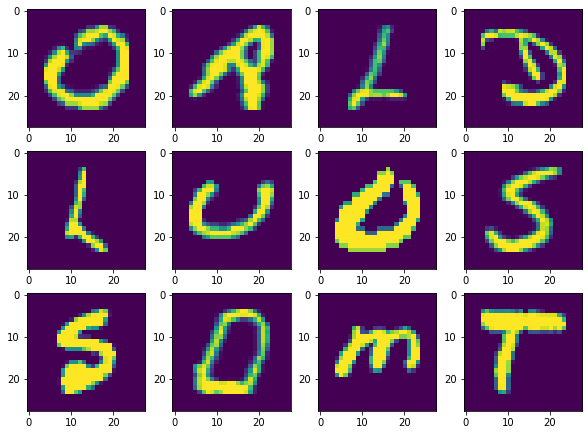

In [226]:
plt.figure(figsize = (10,10))
row, colums = 4, 4
for i in range(12):  
    plt.subplot(colums, row, i+1)
    plt.imshow(x_shuffle.iloc[i].values.reshape(28,28))
plt.show()

In [227]:
#change numbers to corresponding alphabet
alpha_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
data_alpha = df.copy()
df['0'] = df['0'].map(alpha_dict)

In [228]:
#split dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

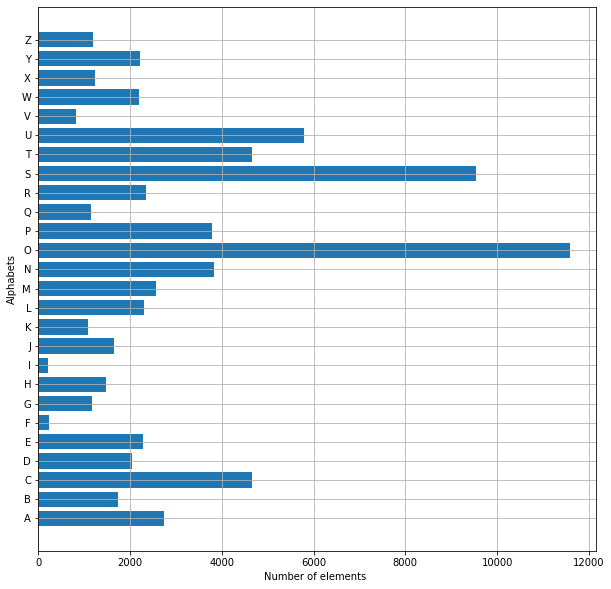

In [229]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in alpha_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [238]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (59790, 28, 28, 1)
New shape of test data:  (14948, 28, 28, 1)


In [239]:
train_y_cat = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_y_cat.shape)
test_y_cat = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_y_cat.shape)

New shape of train labels:  (59621, 26)
New shape of test labels:  (14906, 26)


In [240]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1))) #convolutional
model.add(MaxPool2D(pool_size = (2, 2), strides = 2)) #pooling

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu')) 
model.add(Dense(128, activation = 'relu'))

model.add(Dense(26, activation = 'softmax'))

In [241]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [242]:
history = model.fit(train_x, train_y_cat, epochs=1,  validation_data = (test_x,test_y_cat))

1864/1864 [==============================] - 31s 16ms/step - loss: 1.1797 - accuracy: 0.7479 - val_loss: 0.6834 - val_accuracy: 0.8195


In [260]:
model.save('model2.h5')

In [261]:
image = input("Enter name of image:")

Enter name of image:9


In [ ]:
img = cv.imread('{}.png'.format(int(image)))[:,:,0] #read in image
img = np.invert(np.array([img]))
prediction = model.predict(img)
print("The number is likely: {}".format(np.argmax(prediction)))
plt.imshow(img[0])
plt.show()